In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Gather data

## Pure penalty

```
moose -i frictionless.i Problem/type=FEProblem Outputs/file_base=penalty
```

## Augmented Lagrange

```
moose -i frictionless.i Outputs/file_base=al
```

In [5]:
penalty = pd.read_csv('penalty.csv')
al = pd.read_csv('al.csv')

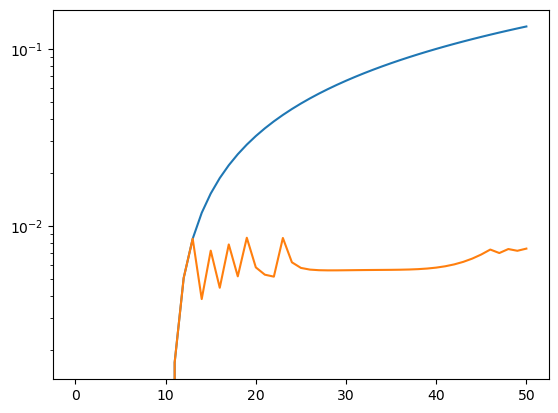

In [6]:
plt.plot(penalty['time'], -penalty['gap'])
plt.plot(al['time'], -al['gap'])
plt.yscale('log')

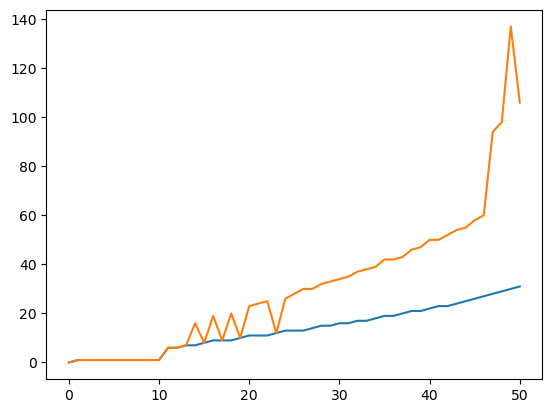

In [7]:
plt.plot(penalty['time'], penalty['num_nl'])
plt.plot(al['time'], al['num_nl'])